In [1]:
import os
from plotly.subplots import make_subplots
from env.utils import load_all_scores, instance_fig

In [2]:
print("HGS scores:")
hgs_antwerp = load_all_scores("logs/dataset_train_realworld_Antwerp_HGS_0.1", [1], ["Antwerp1.txt", "Antwerp2.txt"]).applymap(lambda x: min(x))
hgs_brussels = load_all_scores("logs/dataset_train_realworld_Brussels_HGS_0.1", [1], ["Brussels1.txt", "Brussels2.txt"]).applymap(lambda x: min(x))
hgs_flanders = load_all_scores("logs/dataset_train_realworld_Flanders_HGS_0.1", [1], ["Flanders1.txt", "Flanders2.txt"]).applymap(lambda x: min(x))
hgs_ghent = load_all_scores("logs/dataset_train_realworld_Ghent_HGS_0.1", [1], ["Ghent1.txt", "Ghent2.txt"]).applymap(lambda x: min(x))
hgs_leuven = load_all_scores("logs/dataset_train_realworld_Leuven_HGS_0.1", [1], ["Leuven1.txt", "Leuven2.txt"]).applymap(lambda x: min(x))

best_scores = {}
for instance in [hgs_antwerp, hgs_brussels, hgs_flanders, hgs_ghent, hgs_leuven]:
    for key in instance:
        best_scores[key] = instance[key].values[0]
best_scores

HGS scores:


{'Antwerp1.txt': 489366.6875,
 'Antwerp2.txt': 299574.6875,
 'Brussels1.txt': 522274.8125,
 'Brussels2.txt': 360740.9375,
 'Flanders1.txt': 7442533.0,
 'Flanders2.txt': 4567691.5,
 'Ghent1.txt': 482491.75,
 'Ghent2.txt': 264490.96875,
 'Leuven1.txt': 195906.3125,
 'Leuven2.txt': 112974.21875}

In [3]:
print("VNS scores:")
vns_antwerp = load_all_scores("logs/dataset_train_realworld_Antwerp_VNS_0.1", [1], ["Antwerp1.txt", "Antwerp2.txt"]).applymap(lambda x: min(x))
vns_brussels = load_all_scores("logs/dataset_train_realworld_Brussels_VNS_0.1", [1], ["Brussels1.txt", "Brussels2.txt"]).applymap(lambda x: min(x))
# vns_flanders = load_all_scores("logs/dataset_train_realworld_Flanders_VNS_0.1", [1], ["Flanders1.txt", "Flanders2.txt"]).applymap(lambda x: min(x))
vns_ghent = load_all_scores("logs/dataset_train_realworld_Ghent_VNS_0.1", [1], ["Ghent1.txt", "Ghent2.txt"]).applymap(lambda x: min(x))
vns_leuven = load_all_scores("logs/dataset_train_realworld_Leuven_VNS_0.1", [1], ["Leuven1.txt", "Leuven2.txt"]).applymap(lambda x: min(x))

best_scores = {}
for instance in [vns_antwerp, vns_brussels, vns_ghent, vns_leuven]:
    for key in instance:
        best_scores[key] = instance[key].values[0]
best_scores

VNS scores:


{'Antwerp1.txt': 505864.78125,
 'Antwerp2.txt': 320437.34375,
 'Brussels1.txt': 585333.625,
 'Brussels2.txt': 387801.6875,
 'Ghent1.txt': 515954.25,
 'Ghent2.txt': 281872.75,
 'Leuven1.txt': 201839.1875,
 'Leuven2.txt': 117291.6328125}

In [4]:
def show_graphs(algo, lamb, best_scores, data_name):
    print(f"Graph {algo} - {data_name}")
    n = 2
    width = 180*2*n
    fig = make_subplots(rows=1, cols=n, horizontal_spacing=0.05)
    os.makedirs(f"graphs/dataset_train_realworld_{data_name}_{algo}_{lamb}", exist_ok=True)
    for i, key in enumerate(best_scores.keys()):
        plotly_fig, score = instance_fig(best_scores, key, f"dataset/train/realworld/{data_name}")
        plotly_fig.write_image(f"graphs/dataset_train_realworld_{data_name}_{algo}_{lamb}/{key}.pdf")
        title = key.split(".")[0] + f" - {score:.1f}"
        fig.add_traces(plotly_fig.data, rows=i//n+1, cols=i%n+1)
        fig['layout'][f'xaxis{i+1}'].update(title=title)
    fig.update_layout(height=200*2, width=width)
    fig.update_traces(line_width=1, marker_size=8)
    fig.update_layout(template='plotly_white', margin=dict(l=4, r=4, t=4, b=4, pad=4, autoexpand=True))
    fig.update_xaxes(showgrid=False, showticklabels=False, showline=False, zeroline=False)
    fig.update_yaxes(visible=False)
    fig.update_layout(showlegend=False)
    fig.show('svg')

Graph HGS - Antwerp


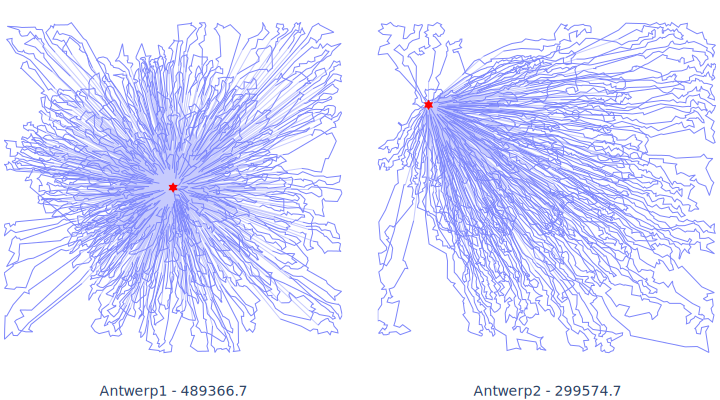

Graph VNS - Antwerp


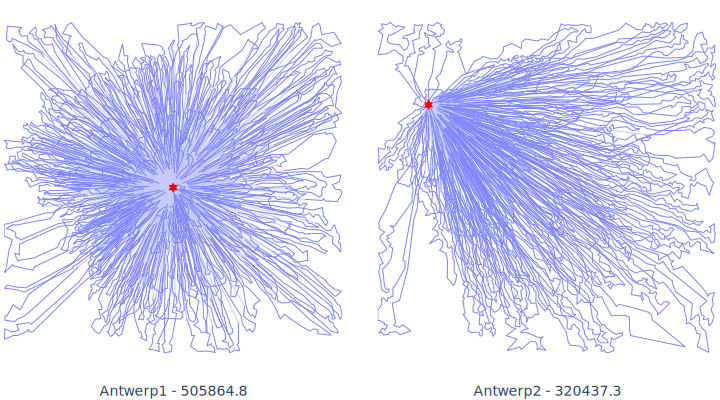

In [5]:
show_graphs("HGS", 0.1, hgs_antwerp, "Antwerp")
show_graphs("VNS", 0.1, vns_antwerp, "Antwerp")

Graph HGS - Brussels


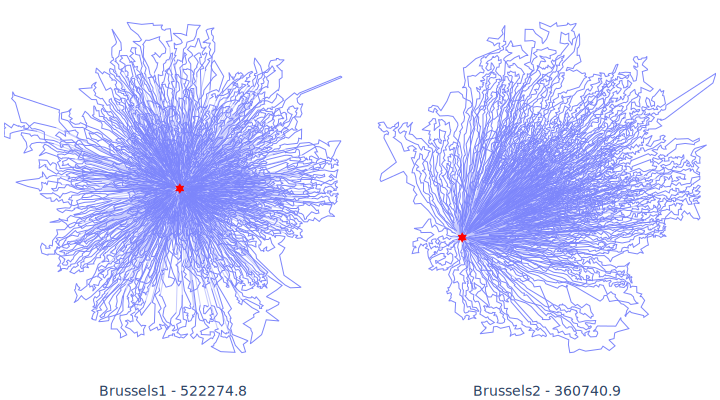

Graph VNS - Brussels


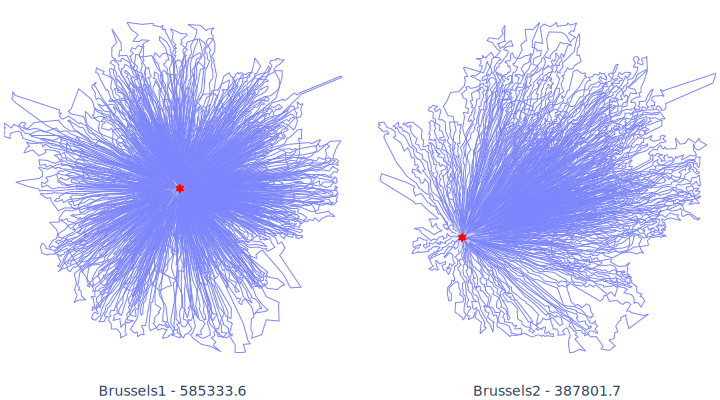

In [6]:
show_graphs("HGS", 0.1, hgs_brussels, "Brussels")
show_graphs("VNS", 0.1, vns_brussels, "Brussels")

Graph HGS - Flanders


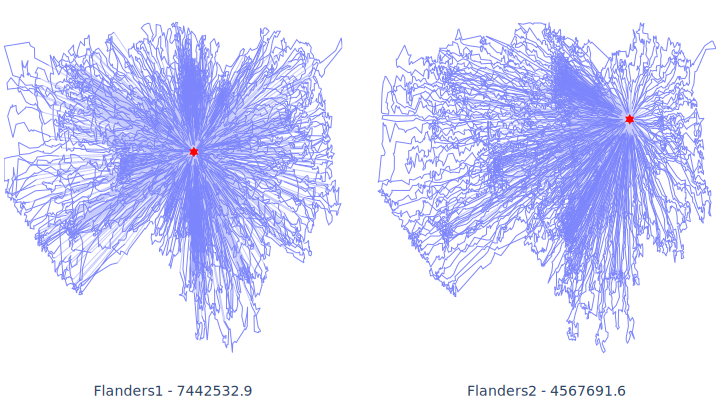

In [7]:
show_graphs("HGS", 0.1, hgs_flanders, "Flanders")
# show_graphs("VNS", 0.1, vns_flanders, "Flanders")

Graph HGS - Ghent


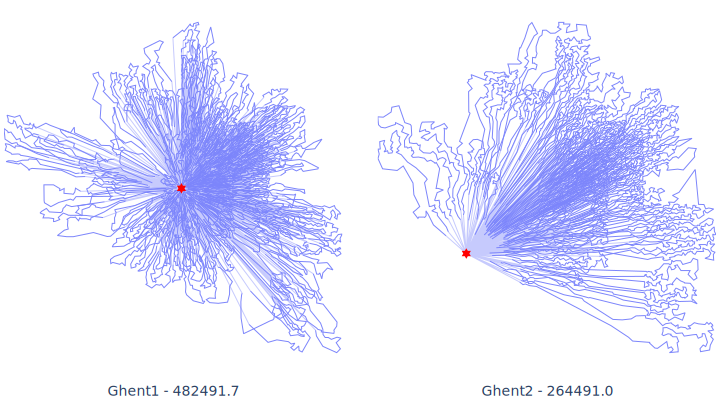

Graph VNS - Ghent


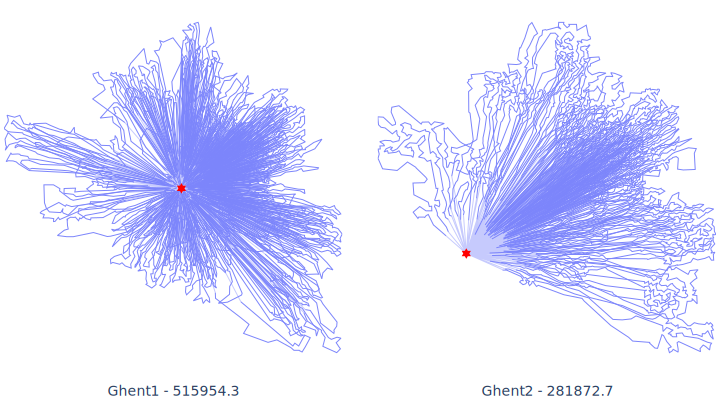

In [8]:
show_graphs("HGS", 0.1, hgs_ghent, "Ghent")
show_graphs("VNS", 0.1, vns_ghent, "Ghent")

Graph HGS - Leuven


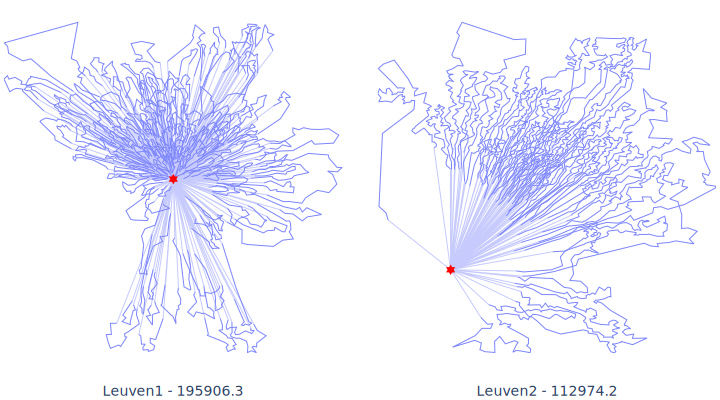

Graph VNS - Leuven


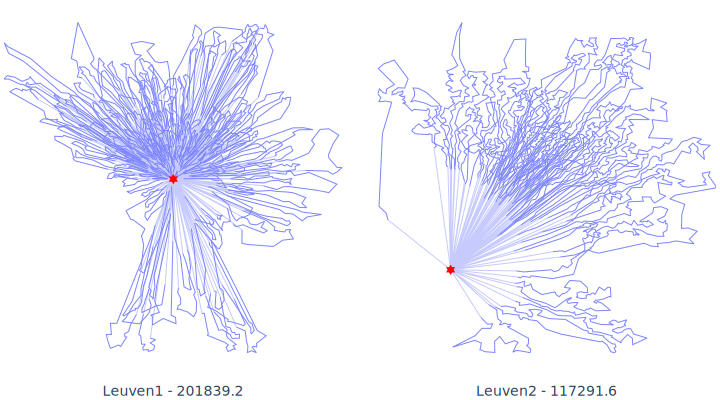

In [9]:
show_graphs("HGS", 0.1, hgs_leuven, "Leuven")
show_graphs("VNS", 0.1, vns_leuven, "Leuven")